<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

The new format for the SAT was released in March 2016. The College Board seeks to track statewide participation and recommends where money is best spent to improve SAT participation rates.

How the College Board might work to increase the participation rate in Arkansas and Tennessee?

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university.

The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections)). The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). They have different score ranges, which you can read more about on their websites or additional outside sources (a quick Google search will help you understand the scores for each test):
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

Standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from sudents' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).

### Choose your Data

Datasets used in the analysis are as shown below:

* [`act_2017.csv`](./data/act_2017.csv): 2017 ACT Scores by State
* [`act_2018.csv`](./data/act_2018.csv): 2018 ACT Scores by State
* [`sat_2017.csv`](./data/sat_2017.csv): 2017 SAT Scores by State
* [`sat_2018.csv`](./data/sat_2018.csv): 2018 SAT Scores by State


### Outside Research

For certain States like Illinois, Connecticut and Delaware, State policies were implemented making SAT mandatory for student in 11th grade, therefore for these States, participation rate for SAT are high at 100%.

In 2016, State officials announced they had signed a three-year, $14.3 million contract with the College Board, the SAT’s distributor, to administer the recently redesigned college entrance exam.

https://dailynorthwestern.com/2016/01/05/city/state-opts-for-distribution-of-sat-over-act-to-illinois-students/

Other States with a big jump in participation rates are Colarado where there was a change in State policy. From April 11th, 2017 all Colorado high school juniors are required to take the SAT and besides, Khan Academy teamed up with the College Board, the makers of the SAT, to provide free and personalized SAT study courses for Colorado students.

https://testive.com/colorado-sat-change-2017/

https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/


### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
def mean_cal(x):
    total = sum(x)
    mean = total / len(x)
    return mean

In [2]:
x = [1,2,3,4,5]

mean_cal(x)

3.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [62]:
def std_deviation_cal(x):
    m = mean_cal(x)
    x_var = [(m - num)**2 for num in x]  
    return(sum(x_var)/(len(x_var)))**0.5

In [63]:
x = [1,2,3,4,5]
std_deviation_cal(x)

1.4142135623730951

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [5]:
def clean_string(x):
    return float(x.replace('%', ''))/100

In [6]:
x = '30.5%'
clean_string(x)    

0.305

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
%matplotlib inline

sns.set_style('whitegrid')

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [8]:
sat_2017 = pd.read_csv('../data/sat_2017.csv')
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')
act_2018 = pd.read_csv('../data/act_2018.csv')

In [9]:
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [10]:
act_2018.head()

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7


In [11]:
#remove 'x' from act_2017 composite score
act_2017.loc[act_2017["State"] == "Wyoming", "Composite"] = 20.2

#convert act_2017 and act_2018 composite dtype to float
act_2017['Composite'] = act_2017['Composite'].astype(float)
act_2018['Composite'] = act_2018['Composite'].astype(float)

In [12]:
# to check if any scores in act_2017 falls out of  1-36 scoring range
act_2018[(act_2018['Composite'] > 36) | (act_2018['Composite'] < 1)]

,State,Participation,Composite


In [13]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


In [14]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [15]:
# to check if any scores in sat_2017 falls out of 400 -1600 scoring range
sat_2017[(sat_2017['Total'] > 1600) | (sat_2017['Total'] < 400)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [16]:
# to check if any scores in sat_2018 falls out of 400 -1600 scoring range
sat_2018[(sat_2018['Total'] > 1600) | (sat_2018['Total'] < 400)]

,State,Participation,Evidence-Based Reading and Writing,Math,Total


In [17]:
# summary statistics for act_2017
act_2017.describe()

,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385,21.509615
std,2.332132,1.963602,2.048672,3.151113,2.002083
min,16.300000,18.000000,18.100000,2.300000,17.800000
25%,19.000000,19.400000,20.475000,19.900000,19.800000
50%,20.550000,20.900000,21.700000,21.150000,21.400000
75%,23.300000,23.100000,24.125000,22.525000,23.600000
max,25.500000,25.300000,26.000000,24.900000,25.500000


In [18]:
# summary statistics for act_2018
act_2018.describe()

,Composite
count,52.000000
mean,21.544231
std,2.119417
min,17.700000
25%,19.975000
50%,21.300000
75%,23.725000
max,25.600000


In [19]:
# summary statistics for sat_2017
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [20]:
# summary statistics for sat_2018
sat_2018.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,563.686275,556.235294,1120.019608
std,47.502627,47.772623,94.155083
min,480.000000,480.000000,977.000000
25%,534.500000,522.500000,1057.500000
50%,552.000000,544.000000,1098.000000
75%,610.500000,593.500000,1204.000000
max,643.000000,655.000000,1298.000000


In [21]:
# check for null values for act_2017
act_2017.isnull().sum()

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [22]:
# check for null values for act_2018
act_2018.isnull().sum()

State            0
Participation    0
Composite        0
dtype: int64

In [23]:
# check for null values for sat_2017
sat_2017.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [24]:
# check for null values for sat_2018
sat_2018.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

In [25]:
# check for datatype for act_2017
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


In [26]:
# check for datatype for act_2018
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   Composite      52 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [27]:
# check for datatype for sat_2017
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [28]:
# check for datatype for sat_2018
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [29]:
#stripping special characters from participation 
act_2017['Participation'] = (act_2017['Participation'].apply(clean_string)*100)
act_2018['Participation'] = (act_2018['Participation'].apply(clean_string)*100)
sat_2017['Participation'] = (sat_2017['Participation'].apply(clean_string)*100)
sat_2018['Participation'] = (sat_2018['Participation'].apply(clean_string)*100)

In [30]:
# remove National line in act_2017
act_2017.drop(act_2017.index[0], axis=0, inplace=True)
act_2017.head()

,State,Participation,English,Math,Reading,Science,Composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [31]:
# renaming columns for act 2017
act_2017.rename(
    columns={'Participation': 'p_act_2017'}, inplace=True)
act_2017.head()

,State,p_act_2017,English,Math,Reading,Science,Composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


In [32]:
# to calculate if figure provided in composite is correct for act_2017
# using the average of total of English, Math, Reading and Science, - Composite
act_2017['tot_cal_diff_act_2017'] = (
    ((act_2017['English'] + act_2017['Math'] + act_2017['Reading'] + act_2017['Science']) / 4
) - act_2017['Composite']
)

In [33]:
# showing the number of columns with rounding difference
act_2017['tot_cal_diff_act_2017'].value_counts()

-0.100    9
-0.125    9
-0.100    7
-0.150    5
-0.175    5
-0.175    4
-0.125    4
-0.125    2
-0.075    2
-5.375    1
-0.050    1
-0.075    1
-0.150    1
Name: tot_cal_diff_act_2017, dtype: int64

In [34]:
act_2017.head()

,State,p_act_2017,English,Math,Reading,Science,Composite,tot_cal_diff_act_2017
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,-0.100
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,-0.100
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,-0.125
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,-0.125
5,California,31.0,22.5,22.7,23.1,22.2,22.8,-0.175


In [35]:
# to calculate if figure provided in composite is correct for sat_2017
# using the average of total of English, Math, Reading and Science, - Composite
sat_2017['tot_cal_diff_sat_2017'] = (
    (sat_2017['Evidence-Based Reading and Writing'] + sat_2017['Math']
)- sat_2017['Total']
)

In [36]:
# showing the number of columns with rounding difference for sat_2017
sat_2017['tot_cal_diff_sat_2017'].value_counts()

 0      35
-1      10
 1       5
-472     1
Name: tot_cal_diff_sat_2017, dtype: int64

In [37]:
act_2017[act_2017['Science'] == 2.3]

,State,p_act_2017,English,Math,Reading,Science,Composite,tot_cal_diff_act_2017
21,Maryland,28.0,23.3,23.1,24.2,2.3,23.6,-5.375


The minimum score for act_2017 Science is 2.3, it seems to be an outlier. Upon checking, the score belongs to state of Maryland. Comparing to the original dataset, there seems to be data entry error. Maryland's average science score should be 23.2 instead of 2.3. 

In [38]:
sat_2017[sat_2017['Math'] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,tot_cal_diff_sat_2017
20,Maryland,69.0,536,52,1060,-472


The minimum score for sat_2017 Math is 52, it seems to be an outlier. Upon checking, the score belongs to state of Maryland. Comparing to the original dataset, there seems to be data entry error. Maryland's average math score should be 524 instead of 52. Leading to a difference of -472 when recalculating total scores.

In [39]:
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,tot_cal_diff_sat_2017
0,Alabama,5.0,593,572,1165,0
1,Alaska,38.0,547,533,1080,0
2,Arizona,30.0,563,553,1116,0
3,Arkansas,3.0,614,594,1208,0
4,California,53.0,531,524,1055,0


In [40]:
# to calculate if figure provided in composite is correct for sat_2018
# using the average of total of English, Math, Reading and Science, - Composite
sat_2018['tot_cal_diff_sat_2018'] = (
    (sat_2018['Evidence-Based Reading and Writing'] + sat_2018['Math']
)- sat_2018['Total']
)

In [41]:
# showing the number of columns with rounding difference for sat_2018
sat_2018['tot_cal_diff_sat_2018'].value_counts()

 0    42
-1     7
 1     2
Name: tot_cal_diff_sat_2018, dtype: int64

In [42]:
sat_2018.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,tot_cal_diff_sat_2018
0,Alabama,6.0,595,571,1166,0
1,Alaska,43.0,562,544,1106,0
2,Arizona,29.0,577,572,1149,0
3,Arkansas,5.0,592,576,1169,-1
4,California,60.0,540,536,1076,0


In [43]:
# remove repeated row for act_2018
act_2018_duplicate = act_2018[act_2018.duplicated()]
act_2018.drop(act_2018.index[19], axis=0, inplace=True)
act_2018.head()

,State,Participation,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7


In [44]:
# renaming columns for act participation
act_2018.rename(
    columns={'Participation': 'p_act_2018'}, inplace=True)
act_2018.rename(
    columns={'Composite': 'avg_act_2018'}, inplace=True)
act_2018.head()

,State,p_act_2018,avg_act_2018
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2
3,Arkansas,100.0,19.4
4,California,27.0,22.7


In [45]:
# adding a new column 'average_score' to show mean of total scores for act_2017 (only english, math and reading)
act_2017['avg_act_2017'] = ((act_2017['English'] + act_2017['Math'] + act_2017['Reading'] + act_2017['Science'])/4)
act_2017['tot_act_2017'] = act_2017['English'] + act_2017['Math'] + act_2017['Reading'] + act_2017['Science']

In [46]:
# lowercase column names for all 4 datasets 
sat_2017.columns = sat_2017.columns.str.lower()
sat_2018.columns = sat_2018.columns.str.lower()
act_2017.columns = act_2017.columns.str.lower()
act_2018.columns = act_2018.columns.str.lower()

In [47]:
# rename of act_2017 section columns for merging of files at the end
act_2017.rename(
    columns={'english': 'e_act_2017', 'math': 'm_act_2017', 'reading': 'r_act_2017', 'science': 's_act_2017', 'composite': 'comp_act_2017'}, inplace=True)

In [48]:
# rename District of Columbia for act_2018 to uppercase C
act_2018['state'] = act_2018['state'].replace({'District of columbia': 'District of Columbia'})

In [49]:
# merging act 2017 and 2018
act_2017_and_2018 = act_2017.merge(act_2018, on = "state", how = 'right')
act_2017_and_2018.head(10) 

,state,p_act_2017,e_act_2017,m_act_2017,r_act_2017,s_act_2017,comp_act_2017,tot_cal_diff_act_2017,avg_act_2017,tot_act_2017,p_act_2018,avg_act_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,-0.100,19.100,76.4,100.0,19.1
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,-0.100,19.700,78.8,33.0,20.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,-0.125,19.575,78.3,66.0,19.2
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,-0.125,19.275,77.1,100.0,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8,-0.175,22.625,90.5,27.0,22.7
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,-0.175,20.625,82.5,30.0,23.9
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,-0.125,25.075,100.3,26.0,25.6
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,-0.125,23.975,95.9,17.0,23.8
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,-0.125,24.075,96.3,32.0,23.6
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,-0.100,19.700,78.8,66.0,19.9


In [50]:
# renaming columns for sat 2017 and 2018
sat_2017.rename(
    columns={'participation': 'p_sat_2017'}, inplace=True)
sat_2018.rename(
    columns={'participation': 'p_sat_2018'}, inplace=True)
sat_2017.rename(
    columns={'total': 'tot_sat_2017'}, inplace=True)
sat_2018.rename(
    columns={'total': 'tot_sat_2018'}, inplace=True)
sat_2017.rename(
    columns={'evidence-based reading and writing': 'e_sat_2017'}, inplace=True)
sat_2018.rename(
    columns={'evidence-based reading and writing': 'e_sat_2018'}, inplace=True)
sat_2017.rename(
    columns={'math': 'm_sat_2017'}, inplace=True)
sat_2018.rename(
    columns={'math': 'm_sat_2018'}, inplace=True)

In [51]:
# finding avg for sat_2017 
sat_2017['avg_sat_2017'] = sat_2017['tot_sat_2017']/4
sat_2018['avg_sat_2018'] = sat_2018['tot_sat_2018']/4

In [52]:
# merging sat 2017 and 2018
sat_2017_and_2018 = sat_2017.merge(sat_2018, on = "state", how = 'right')
sat_2017_and_2018.head(20)

,state,p_sat_2017,e_sat_2017,m_sat_2017,tot_sat_2017,tot_cal_diff_sat_2017,avg_sat_2017,p_sat_2018,e_sat_2018,m_sat_2018,tot_sat_2018,tot_cal_diff_sat_2018,avg_sat_2018
0,Alabama,5.0,593,572,1165,0,291.25,6.0,595,571,1166,0,291.50
1,Alaska,38.0,547,533,1080,0,270.00,43.0,562,544,1106,0,276.50
2,Arizona,30.0,563,553,1116,0,279.00,29.0,577,572,1149,0,287.25
3,Arkansas,3.0,614,594,1208,0,302.00,5.0,592,576,1169,-1,292.25
4,California,53.0,531,524,1055,0,263.75,60.0,540,536,1076,0,269.00
5,Colorado,11.0,606,595,1201,0,300.25,100.0,519,506,1025,0,256.25
6,Connecticut,100.0,530,512,1041,1,260.25,100.0,535,519,1053,1,263.25
7,Delaware,100.0,503,492,996,-1,249.00,100.0,505,492,998,-1,249.50
8,District of Columbia,100.0,482,468,950,0,237.50,92.0,497,480,977,0,244.25
9,Florida,83.0,520,497,1017,0,254.25,56.0,550,549,1099,0,274.75


In [53]:
# merging act 2017 and 2018
act_2017_and_2018 = act_2017.merge(act_2018, on = "state", how = 'right')
act_2017_and_2018.head(20)

,state,p_act_2017,e_act_2017,m_act_2017,r_act_2017,s_act_2017,comp_act_2017,tot_cal_diff_act_2017,avg_act_2017,tot_act_2017,p_act_2018,avg_act_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,-0.100,19.100,76.4,100.0,19.1
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,-0.100,19.700,78.8,33.0,20.8
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,-0.125,19.575,78.3,66.0,19.2
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,-0.125,19.275,77.1,100.0,19.4
4,California,31.0,22.5,22.7,23.1,22.2,22.8,-0.175,22.625,90.5,27.0,22.7
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,-0.175,20.625,82.5,30.0,23.9
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,-0.125,25.075,100.3,26.0,25.6
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,-0.125,23.975,95.9,17.0,23.8
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,-0.125,24.075,96.3,32.0,23.6
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,-0.100,19.700,78.8,66.0,19.9


In [54]:
# merging sat and act
all_data = act_2017_and_2018.merge(sat_2017_and_2018, on = "state", how = 'right')
all_data.head(10)

,state,p_act_2017,e_act_2017,m_act_2017,r_act_2017,s_act_2017,comp_act_2017,tot_cal_diff_act_2017,avg_act_2017,tot_act_2017,...,m_sat_2017,tot_sat_2017,tot_cal_diff_sat_2017,avg_sat_2017,p_sat_2018,e_sat_2018,m_sat_2018,tot_sat_2018,tot_cal_diff_sat_2018,avg_sat_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,-0.100,19.100,76.4,...,572,1165,0,291.25,6.0,595,571,1166,0,291.50
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,-0.100,19.700,78.8,...,533,1080,0,270.00,43.0,562,544,1106,0,276.50
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,-0.125,19.575,78.3,...,553,1116,0,279.00,29.0,577,572,1149,0,287.25
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,-0.125,19.275,77.1,...,594,1208,0,302.00,5.0,592,576,1169,-1,292.25
4,California,31.0,22.5,22.7,23.1,22.2,22.8,-0.175,22.625,90.5,...,524,1055,0,263.75,60.0,540,536,1076,0,269.00
5,Colorado,100.0,20.1,20.3,21.2,20.9,20.8,-0.175,20.625,82.5,...,595,1201,0,300.25,100.0,519,506,1025,0,256.25
6,Connecticut,31.0,25.5,24.6,25.6,24.6,25.2,-0.125,25.075,100.3,...,512,1041,1,260.25,100.0,535,519,1053,1,263.25
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,-0.125,23.975,95.9,...,492,996,-1,249.00,100.0,505,492,998,-1,249.50
8,District of Columbia,32.0,24.4,23.5,24.9,23.5,24.2,-0.125,24.075,96.3,...,468,950,0,237.50,92.0,497,480,977,0,244.25
9,Florida,73.0,19.0,19.4,21.0,19.4,19.8,-0.100,19.700,78.8,...,497,1017,0,254.25,56.0,550,549,1099,0,274.75


In [55]:
all_data.isnull().sum()

state                    0
p_act_2017               0
e_act_2017               0
m_act_2017               0
r_act_2017               0
s_act_2017               0
comp_act_2017            0
tot_cal_diff_act_2017    0
avg_act_2017             0
tot_act_2017             0
p_act_2018               0
avg_act_2018             0
p_sat_2017               0
e_sat_2017               0
m_sat_2017               0
tot_sat_2017             0
tot_cal_diff_sat_2017    0
avg_sat_2017             0
p_sat_2018               0
e_sat_2018               0
m_sat_2018               0
tot_sat_2018             0
tot_cal_diff_sat_2018    0
avg_sat_2018             0
dtype: int64

In [56]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  51 non-null     object 
 1   p_act_2017             51 non-null     float64
 2   e_act_2017             51 non-null     float64
 3   m_act_2017             51 non-null     float64
 4   r_act_2017             51 non-null     float64
 5   s_act_2017             51 non-null     float64
 6   comp_act_2017          51 non-null     float64
 7   tot_cal_diff_act_2017  51 non-null     float64
 8   avg_act_2017           51 non-null     float64
 9   tot_act_2017           51 non-null     float64
 10  p_act_2018             51 non-null     float64
 11  avg_act_2018           51 non-null     float64
 12  p_sat_2017             51 non-null     float64
 13  e_sat_2017             51 non-null     int64  
 14  m_sat_2017             51 non-null     int64  
 15  tot_sat_

In [57]:
all_data.to_csv('../data/combined.csv', index=False)

### Data Dictionary


|Feature|Type|Dataset|Description|
|---|---|---|---|
|e_act_2017|float|ACT 2017|English scores for ACT 2017| 
|m_act_2017|float|ACT 2017|Math scores for ACT 2017| 
|r_act_2017|float|ACT 2017|Reading scores for ACT 2017| 
|s_act_2017|float|ACT 2017|Science scores for ACT 2017| 
|comp_act_year|float|ACT 2017 and 2018|Composite scores for ACT 2017 and 2018 (provided)|
|tot_cal_diff_exam_year|integer|ACT/SAT 2017 and 2018|Difference in calculated total scores and total scores provided| ACT/SAT 2017 and 2018|
|e_sat_year|integer/float|SAT 2017 and 2018|English scores for SAT 2017 and 2018|
|m_sat_year|integer/float|SAT 2017 and 2018|Math scores for SAT 2017 and 2018|
|avg_act_year|float|ACT 2017 and 2018|The calculation for average of scores provided| 
|avg_sat_year|float|SAT 2017 and 2018|The calculation for average of scores provided| 
|tot_act_year|float|ACT 2017 and 2018|The total of scores provided (range: 1 - 36)| 
|tot_sat_year|integer|SAT 2017 and 2018|The total of scores provided (range: 400 - 1600)| 
|p_act_year|float|ACT 2017 and 2018|The participation rate of relevant examinations, 100 = 100%| 
|p_sat_year|float|SAT 2017 and 2018|The participation rate of relevant examinations, 100 = 100%| 


## Exploratory Data Analysis

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [58]:
# Summary statistics 
all_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p_act_2017,51.0,65.254902,32.140842,8.000,31.0000,69.000,100.0000,100.00
e_act_2017,51.0,20.931373,2.353677,16.300,19.0000,20.700,23.3000,25.50
m_act_2017,51.0,21.182353,1.981989,18.000,19.4000,20.900,23.1000,25.30
r_act_2017,51.0,22.013725,2.067271,18.100,20.4500,21.800,24.1500,26.00
s_act_2017,51.0,21.041176,3.182463,2.300,19.9000,21.300,22.7500,24.90
comp_act_2017,51.0,21.519608,2.020695,17.800,19.8000,21.400,23.6000,25.50
tot_cal_diff_act_2017,51.0,-0.227451,0.735888,-5.375,-0.1500,-0.125,-0.1000,-0.05
avg_act_2017,51.0,21.292157,2.047031,17.650,19.6875,21.275,23.0625,25.35
tot_act_2017,51.0,85.168627,8.188125,70.600,78.7500,85.100,92.2500,101.40
p_act_2018,51.0,61.725490,34.037085,7.000,28.5000,66.000,100.0000,100.00


As mentioned above in the data cleaning section, the minimum score for act_2017 Maryland Science is 2.3. Comparing to the original dataset, there seems to be data entry error. Maryland's average science score should be 23.2 instead of 2.3, as shown in s_act_2017 min.

Also, the minimum score for sat_2017 Maryland Math is 52. Comparing to the original dataset, there seems to be data entry error. Maryland's average math score should be 524 instead of 52. Leading to a difference of -472 when recalculating total scores, as shown in the tot_cal_diff_sat_2017 row.

The min and max row shows the smallest and largest number for each columns in the dataframe, for all 51 counts of States. 

#### tot_act_2017/2018:

The min and max of tot_act_2017 should not be less than 1 and more than 36, as the scoring range for the examination is between 1 and 36.

#### tot_sat_2017/2018:

Similarly, the min and max of tot_sat_2017 should not be less than 400 and more than 1600, as the scoring range for the examination is between 400 and 1600.

In [64]:
sd = {k: round(std_deviation_cal(v), 2) for k, v in all_data.items() if k != 'state'} 
sd

{'p_act_2017': 31.82,
 'e_act_2017': 2.33,
 'm_act_2017': 1.96,
 'r_act_2017': 2.05,
 's_act_2017': 3.15,
 'comp_act_2017': 2.0,
 'tot_cal_diff_act_2017': 0.73,
 'avg_act_2017': 2.03,
 'tot_act_2017': 8.11,
 'p_act_2018': 33.7,
 'avg_act_2018': 2.09,
 'p_sat_2017': 34.93,
 'e_sat_2017': 45.22,
 'm_sat_2017': 84.07,
 'tot_sat_2017': 91.58,
 'tot_cal_diff_sat_2017': 65.43,
 'avg_sat_2017': 22.9,
 'p_sat_2018': 36.95,
 'e_sat_2018': 47.03,
 'm_sat_2018': 47.3,
 'tot_sat_2018': 93.23,
 'tot_cal_diff_sat_2018': 0.41,
 'avg_sat_2018': 23.31}

In [74]:
# Which states have the highest participation rates for the SAT in 2017 and 2018 
all_data.loc[
    (all_data['p_sat_2017'] == max(all_data['p_sat_2017'])) & (all_data['p_sat_2018'] == max(all_data['p_sat_2018'])),
    ['state', 'p_sat_2017', 'p_sat_2018'] 
].sort_values(
    ['p_sat_2017'],
    ascending=False
)

,state,p_sat_2017,p_sat_2018
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
22,Michigan,100.0,100.0


Table above shows the highest participation rate for SAT for both 2017 and 2018. 100% participation rate for only 2017 or 2018 has been excluded in the table.

In [69]:
# Which states have the highest participation rates for the ACT in 2017 and 2018 
all_data.loc[
    (all_data['p_act_2017'] == max(all_data['p_act_2017'])) & (all_data['p_act_2018'] == max(all_data['p_act_2018'])),
    ['state', 'p_act_2017', 'p_act_2018'] 
].sort_values(
    ['p_act_2017'],
    ascending=False
).head(20)

,state,p_act_2017,p_act_2018
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
17,Kentucky,100.0,100.0
18,Louisiana,100.0,100.0
24,Mississippi,100.0,100.0
25,Missouri,100.0,100.0
26,Montana,100.0,100.0
28,Nevada,100.0,100.0
33,North Carolina,100.0,100.0
35,Oklahoma,100.0,100.0


Table above only shows the highest participation rate for ACT for both 2017 and 2018. 100% participation rate for only 2017 or 2018 has been excluded in the table.

In [72]:
# Which states have the lowest participation rates for the ACT in 2017 and 2018
all_data.loc[
    (all_data['p_act_2017'].between(0, 20) & (all_data['p_act_2018'].between(0, 20))), 
    ['state', 'p_act_2017', 'p_act_2018']].sort_values(by=['p_act_2017'], ascending=True)

,state,p_act_2017,p_act_2018
19,Maine,8.0,7.0
7,Delaware,18.0,17.0
29,New Hampshire,18.0,16.0


Table above shows the lowest participation rate for ACT for both 2017 and 2018, at a range of 0% to 20%. 
District of Columbia has 0% participation for both years, and the other 3 states has dropped by 1%.

In [69]:
# Which states have the lowest participation rates for the SAT in 2017 and 2018
all_data.loc[
    (all_data['p_sat_2017'].between(0, 20) & (all_data['p_sat_2018'].between(0, 20))), 
    ['state', 'p_sat_2017', 'p_sat_2018']]

,state,p_sat_2017,p_sat_2018
0,Alabama,5.0,6.0
3,Arkansas,3.0,5.0
15,Iowa,2.0,3.0
16,Kansas,4.0,4.0
17,Kentucky,4.0,4.0
18,Louisiana,4.0,4.0
23,Minnesota,3.0,4.0
24,Mississippi,2.0,3.0
25,Missouri,3.0,4.0
26,Montana,10.0,10.0


Table above shows the lowest participation rate for SAT for both 2017 and 2018, at a range of 0% to 20%. With North Dakota at 2% participation for years 2017 and 2018, and Ohio increasing from 12% to 18% in 2017 and 2018.

In [34]:
# states that has increase participation rates year on year for ACT 2017 and 2018
all_data.loc[
    ((all_data['p_act_2017']) < (all_data['p_act_2018'])) & ((all_data['p_act_2018']) > (all_data['p_act_2017'])), 
    ['state', 'p_act_2017', 'p_act_2018']]

,state,p_act_2017,p_act_2018
2,Arizona,62.0,66.0
15,Iowa,67.0,68.0
20,Maryland,28.0,31.0
27,Nebraska,84.0,100.0
31,New Mexico,66.0,67.0
36,Ohio,75.0,100.0
37,Oregon,40.0,42.0


Above table shows the participation rates that increased from 2017 and 2018 for ACT. For states that have decreased participation rate from 2017 to 2018 or states that have maintained participation rates are not shown.

In [68]:
# states that has increase participation rates year on year for SAT 2017 and 2018
all_data.loc[
    ((all_data['p_sat_2017']) < (all_data['p_sat_2018'])) & ((all_data['p_sat_2018']) > (all_data['p_sat_2017'])), 
    ['state', 'p_sat_2017', 'p_sat_2018']].head(10)

,state,p_sat_2017,p_sat_2018
0,Alabama,5.0,6.0
1,Alaska,38.0,43.0
3,Arkansas,3.0,5.0
4,California,53.0,60.0
5,Colorado,11.0,100.0
10,Georgia,61.0,70.0
11,Hawaii,55.0,56.0
12,Idaho,93.0,100.0
13,Illinois,9.0,99.0
15,Iowa,2.0,3.0


Above table shows the participation rates that increased from 2017 and 2018 for SAT. For states that have decreased participation rate from 2017 to 2018 or states that have maintained participation rates are not shown.

For states Illinois and Colorado, there is a spike in participation rate, which we will further discuss in the conclusion section.

In [36]:
# Do any states have >50% participation on both tests in 2017
all_data.loc[
    (all_data['p_act_2017'] > 50 ) & (all_data['p_sat_2017'] > 50), 
    ['state','p_act_2017','p_sat_2017']
]

,state,p_act_2017,p_sat_2017
9,Florida,73.0,83.0
10,Georgia,55.0,61.0
11,Hawaii,90.0,55.0


Table above shows the participation rate for both ACT and SAT in 2017. Only participation rates of more than 50% for both ACT and SAT are shown. For states that have more than 50% in a year but not in the other year are not shown.

In [37]:
# Do any states have >50% participation on both tests in 2018
all_data.loc[
    (all_data['p_act_2018'] > 50 ) & (all_data['p_sat_2018'] > 50), 
    ['state','p_act_2018','p_sat_2018']
]

,state,p_act_2018,p_sat_2018
9,Florida,66.0,56.0
10,Georgia,53.0,70.0
11,Hawaii,89.0,56.0
33,North Carolina,100.0,52.0
40,South Carolina,100.0,55.0


Table above shows the participation rate for both ACT and SAT in 2018. Only participation rates of more than 50% for both ACT and SAT are shown. For states that have more than 50% in a year but not in the other year are not shown.

**To-Do:** *Edit this cell with your findings on trends in the data (step 3 above).*

## Visualize the Data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [70]:
all_data.head()

,state,p_act_2017,e_act_2017,m_act_2017,r_act_2017,s_act_2017,comp_act_2017,tot_cal_diff_act_2017,avg_act_2017,tot_act_2017,...,m_sat_2017,tot_sat_2017,tot_cal_diff_sat_2017,avg_sat_2017,p_sat_2018,e_sat_2018,m_sat_2018,tot_sat_2018,tot_cal_diff_sat_2018,avg_sat_2018
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,-0.100,19.100,76.4,...,572,1165,0,291.25,6.0,595,571,1166,0,291.50
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,-0.100,19.700,78.8,...,533,1080,0,270.00,43.0,562,544,1106,0,276.50
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,-0.125,19.575,78.3,...,553,1116,0,279.00,29.0,577,572,1149,0,287.25
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,-0.125,19.275,77.1,...,594,1208,0,302.00,5.0,592,576,1169,-1,292.25
4,California,31.0,22.5,22.7,23.1,22.2,22.8,-0.175,22.625,90.5,...,524,1055,0,263.75,60.0,540,536,1076,0,269.00


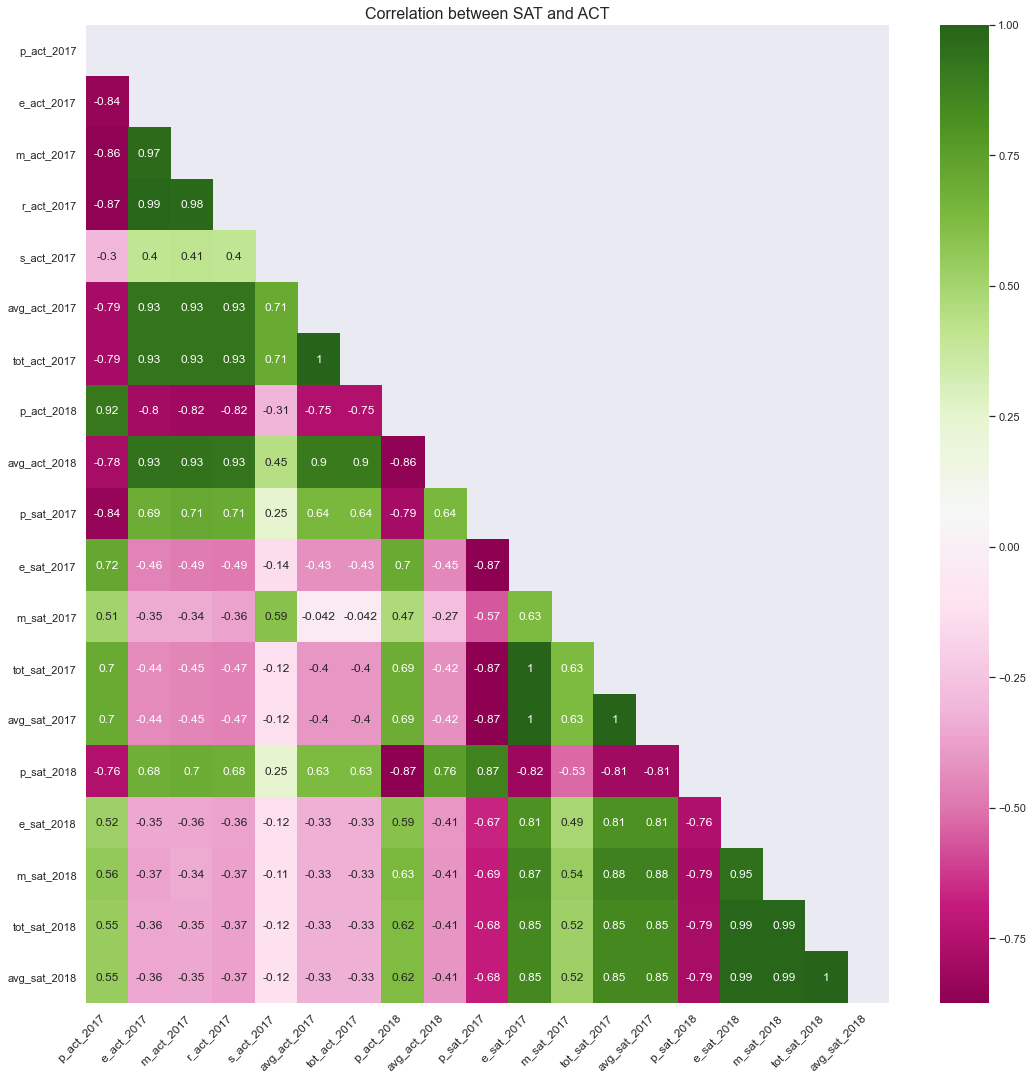

In [73]:
# Heatmap 

plt.figure(figsize=(18,18))

df = all_data.drop(['comp_act_2017','tot_cal_diff_act_2017', 'tot_cal_diff_sat_2017', 'tot_cal_diff_sat_2018'], axis=1)

mask = np.triu(np.ones_like(df.corr(), dtype=bool)) 
cmap = 'PiYG' 
sns.heatmap(df.corr(),mask = mask, cmap = cmap, annot=True)

#labels for x and y axis
plt.yticks(rotation=0)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
)
plt.title('Correlation between SAT and ACT', fontsize=16);

ACT 2017 participation and SAT 2017 participation are strong negatively correlated (-0.84). Possible reason could be states that participated in either the SAT or ACT. Similarly for 2018 as well (-0.76).

SAT 2017 participation and SAT 2018 participation are strong positively correlated (0.87). States who participate in SAT 2017 tends to participate in 2018 as well. Similary for ACT test, states who take part in ACT in 2017 will also likely take part in 2018 (0.92).

SAT 2018 participation and SAT 2018 subjects english (-0.76), math(-0.79), total(-0.79) are generally negatively correlated. This means higher participation leads to lower score, vice versa, lower participation leads to higher score.

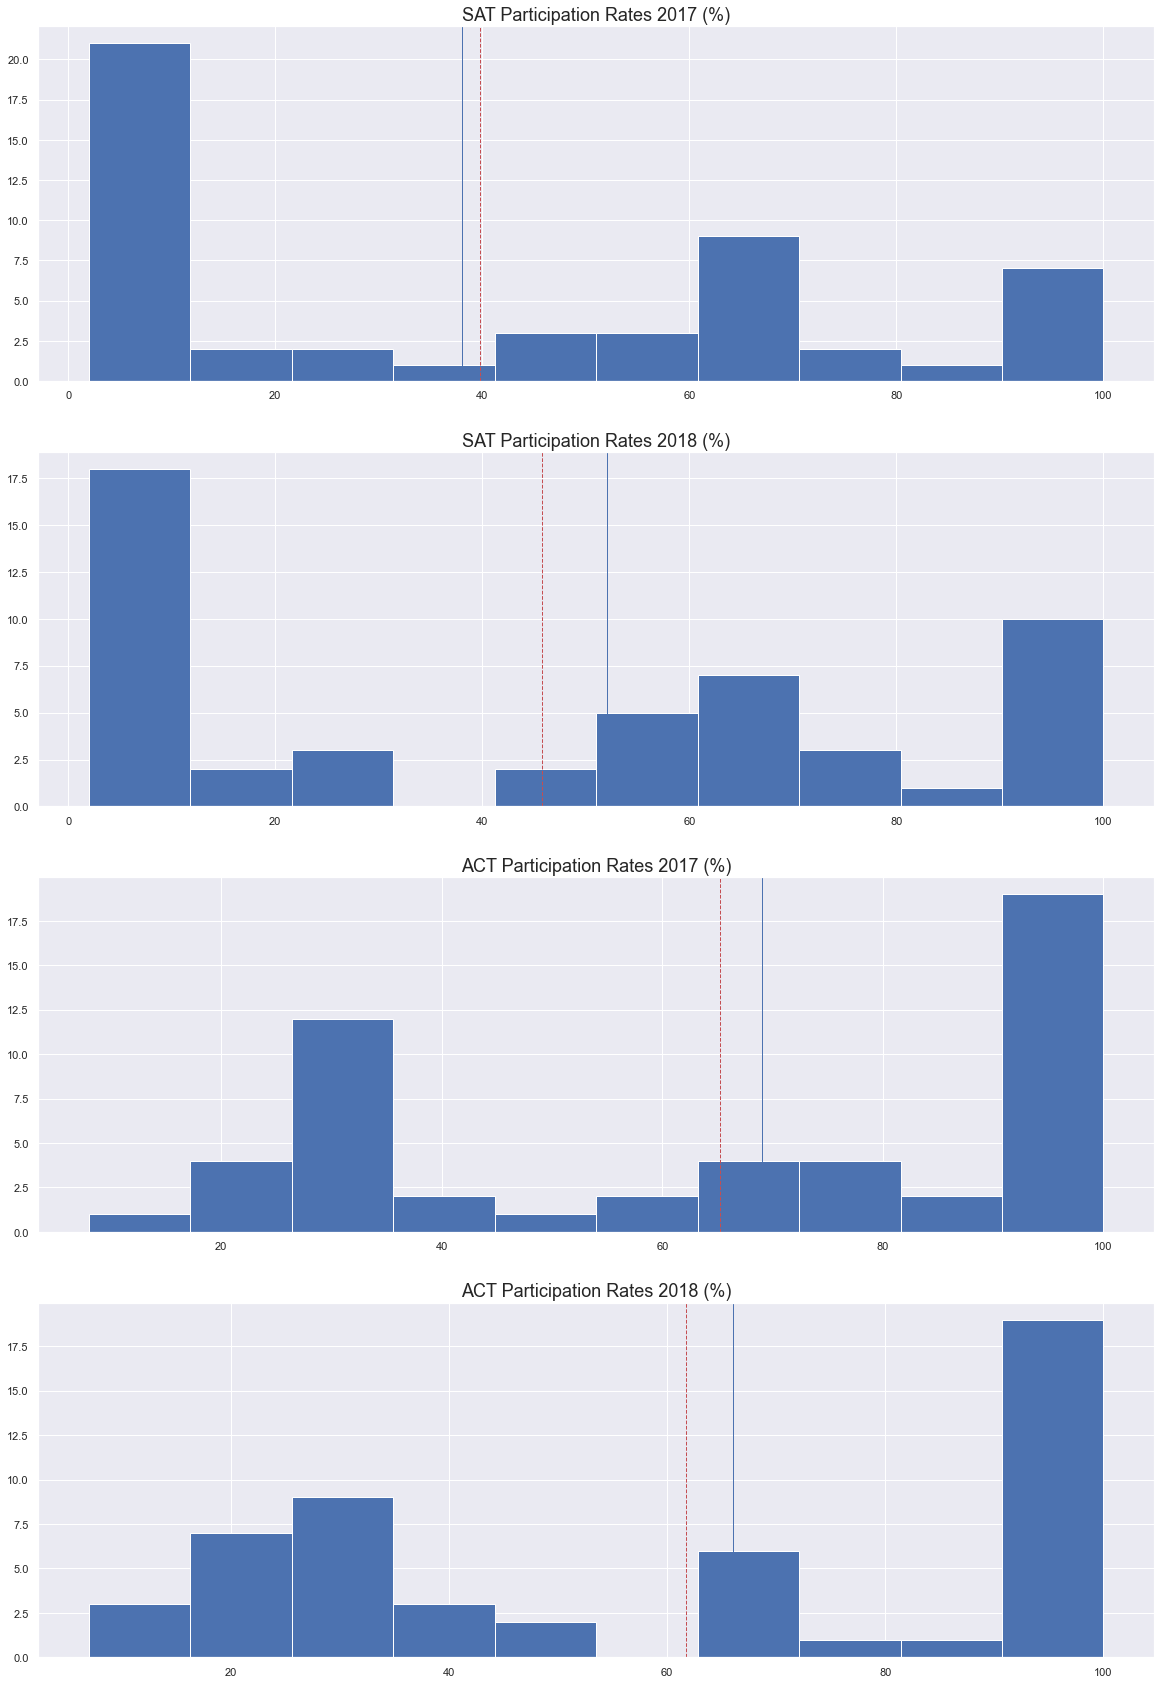

In [58]:
## Histogram for ACT/SAT 2017 and 2018
plt.figure(figsize = (20,30))

# plt.subplot(4, 1, 1) 
ax2 = plt.subplot(4,1,1)
ax2.set_title('SAT Participation Rates 2017 (%)', fontsize=18)
ax2.hist(all_data.loc[:,'p_sat_2017'])
plt.axvline(all_data['p_sat_2017'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(all_data['p_sat_2017'].median(), color='b', linewidth=1);

# plt.subplot(4, 1, 2)
ax2 = plt.subplot(4,1,2)
ax2.set_title('SAT Participation Rates 2018 (%)', fontsize=18)
ax2.hist(all_data.loc[:,'p_sat_2018'])
plt.axvline(all_data['p_sat_2018'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(all_data['p_sat_2018'].median(), color='b', linewidth=1);

# plt.subplot(4, 1, 3)
ax2 = plt.subplot(4,1,3)
ax2.set_title('ACT Participation Rates 2017 (%)', fontsize=18)
ax2.hist(all_data.loc[:,'p_act_2017'])
plt.axvline(all_data['p_act_2017'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(all_data['p_act_2017'].median(), color='b', linewidth=1);

# plt.subplot(4, 1, 4)
ax2 = plt.subplot(4,1,4)
ax2.set_title('ACT Participation Rates 2018 (%)', fontsize=18)
ax2.hist(all_data.loc[:,'p_act_2018'])
plt.axvline(all_data['p_act_2018'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(all_data['p_act_2018'].median(), color='b', linewidth=1);


#### SAT Participation Rates 2017 and 2018
As seen from the graph, both graphs are skewed to the right and both have the same shape, with the majority of States in the 2% to 10% range.

On assumption that data we sample from a population will be normally distrubuted, we do not observe this trend here. A normal distribution graph usually peaks at the centre of the graph when mean(red dotted line) and median (blue line) are equal.

The mean and median shifted to the right, with median higher than mean in 2018 as compared to 2017. This could be due to the increase in participation rates in the 50% to 60% range, and also the 90% to 100% range.

#### ACT Participation Rates 2017 and 2018
Both graphs are skewed towards the left. Both the mean and median decreased minimally from 2017 to 2018, due to the decrease mainly in the participation rate of 30% and also the 70% to 80% range.


#### SAT & ACT Participation Rate:

ACT has a higher mean median compared to SAT. This is due to higher ACT participation rates on the higher side at majority of it in the 90% to 100% range for ACT and SAT with highest participation rates on the lower range of 2% to 10% for both 2017 and 2018.

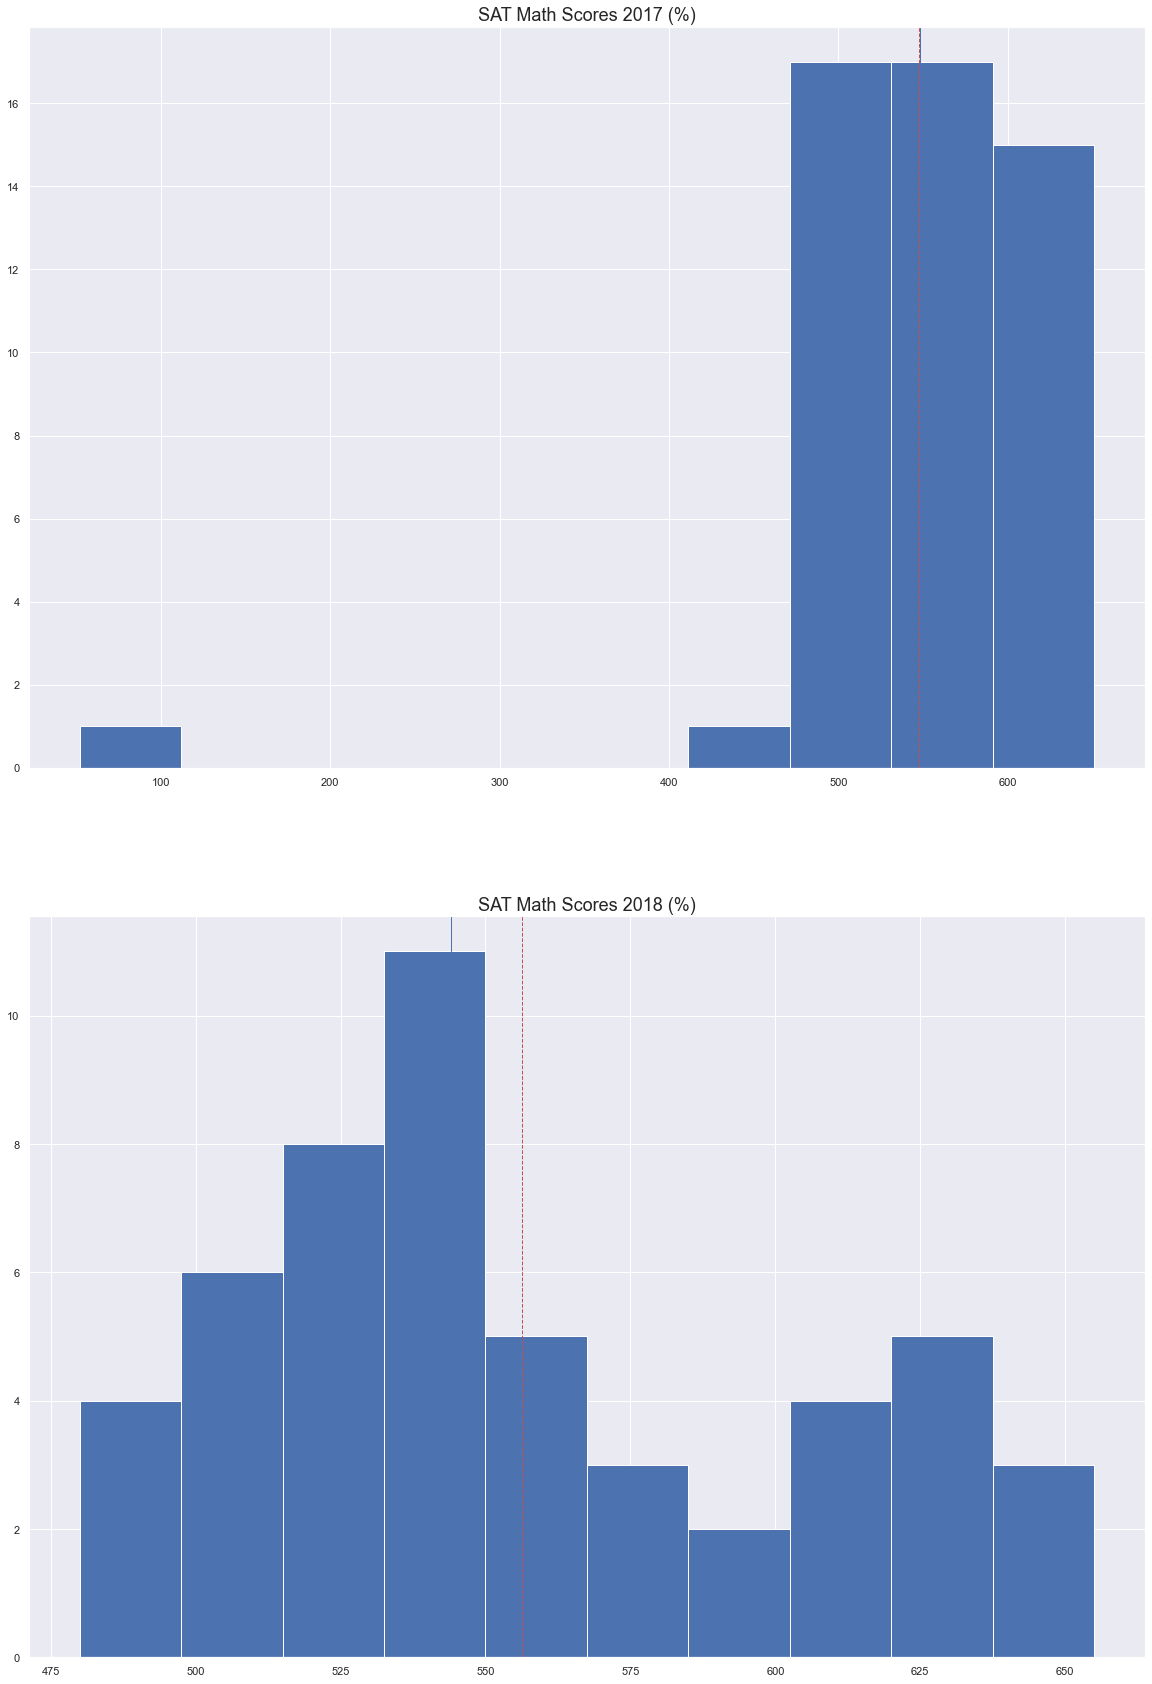

In [109]:
## Histogram for SAT total scores 2017 and 2018  
plt.figure(figsize = (20,30))

# plt.subplot(2, 1, 1) 
ax2 = plt.subplot(2,1,1)
ax2.set_title('SAT Math Scores 2017 (%)', fontsize=18)
ax2.hist(all_data.loc[:,'m_sat_2017'])
plt.axvline(all_data['m_sat_2017'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(all_data['m_sat_2017'].median(), color='b', linewidth=1);

# plt.subplot(2, 1, 2)
ax2 = plt.subplot(2,1,2)
ax2.set_title('SAT Math Scores 2018 (%)', fontsize=18)
ax2.hist(all_data.loc[:,'m_sat_2018'])
plt.axvline(all_data['m_sat_2018'].mean(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(all_data['m_sat_2018'].median(), color='b', linewidth=1);

# plt.subplot(4, 1, 3) 
#ax2 = plt.subplot(4,1,3)
#ax2.set_title('ACT Average Scores 2017 (%)', fontsize=18)
#ax2.hist(all_data.loc[:,'avg_act_2017'])
#plt.axvline(all_data['avg_act_2017'].mean(), color='r', linestyle='dashed', linewidth=1)
#plt.axvline(all_data['avg_act_2017'].median(), color='b', linewidth=1);

# plt.subplot(4, 1, 4)
#ax2 = plt.subplot(4,1,4)
#ax2.set_title('ACT Average Scores 2018 (%)', fontsize=18)
#ax2.hist(all_data.loc[:,'avg_act_2018'])
#plt.axvline(all_data['avg_act_2018'].mean(), color='r', linestyle='dashed', linewidth=1)
#plt.axvline(all_data['avg_act_2018'].median(), color='b', linewidth=1);

There is a huge shift for both the median and median Math socres for SAT 2017 and 2018. In 2018, we see students getting lower scores for Math as compared to 2017. This could be explained by the correlation mentioned above, that higher participation does not necessary lead to higher score.

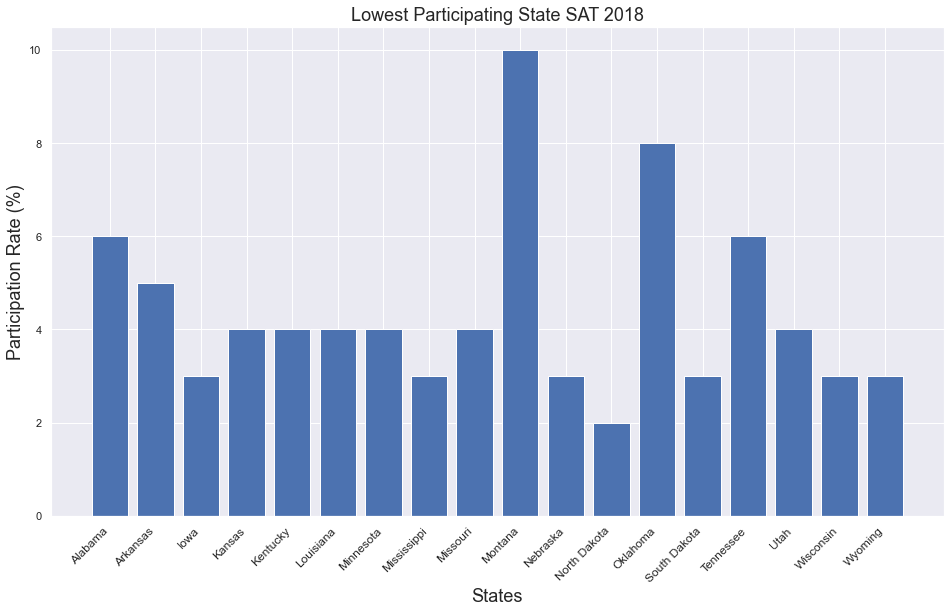

In [113]:
# states with the lowest participating rate for SAT 2018
plt.figure(figsize = (16, 9))

placeholder = all_data.loc[
    (all_data['p_sat_2018'].between(0, 10), 
    ['state', 'p_sat_2018'])]

plt.bar(
    placeholder['state'],
    placeholder['p_sat_2018']
)

# Add a title and show the plot.
plt.title("Lowest Participating State SAT 2018",fontsize=18)
plt.ylabel('Participation Rate (%)',fontsize=18)
plt.xlabel('States',fontsize=18)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium',
);

Graph shows the states with the lowest participation rates in 2018. 

We have the 14 out of 51 States shown, with participation rate of 2% to 5%, with North Dakota at 2% and Arkansas with 5%.

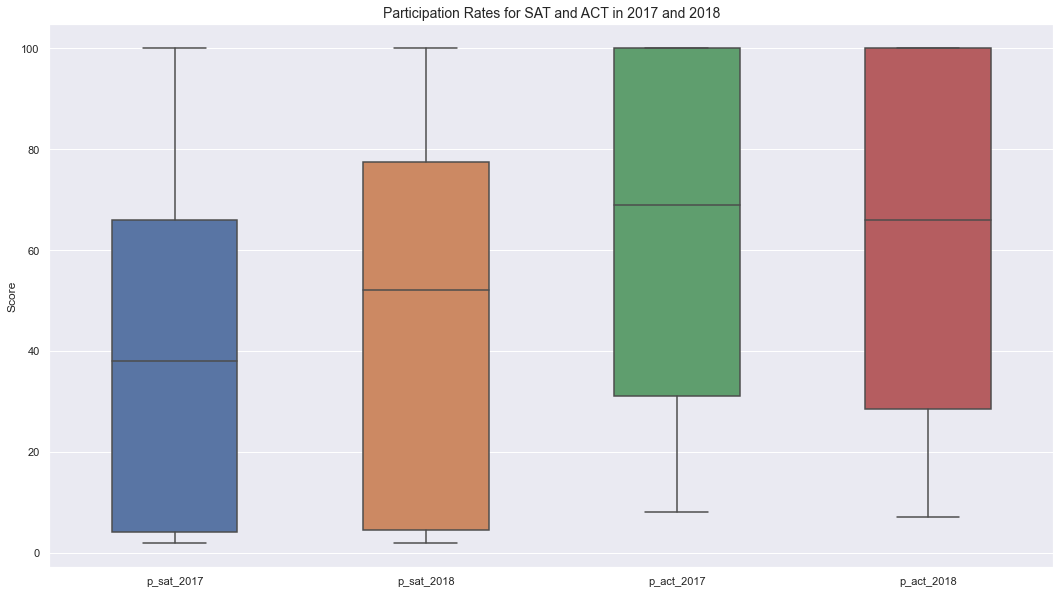

In [112]:
# boxplot for ACT/SAT participation rates 2017 and 2018
ax= plt.subplots(figsize=(18,10))
plt.title('Participation Rates for SAT and ACT in 2017 and 2018',fontsize=14)
plt.ylabel('Score',fontsize=12)
use=all_data[['p_sat_2017','p_sat_2018','p_act_2017','p_act_2018']]
sns.boxplot(data=use, width=0.5);

There is an increase in the median participation rates for SAT 2017 to 2018. This could be due to change in certain state policies for SAT requirements, which will be discussed below.

As for ACT, there is only a slight movement in median range between 2017 and 2018.

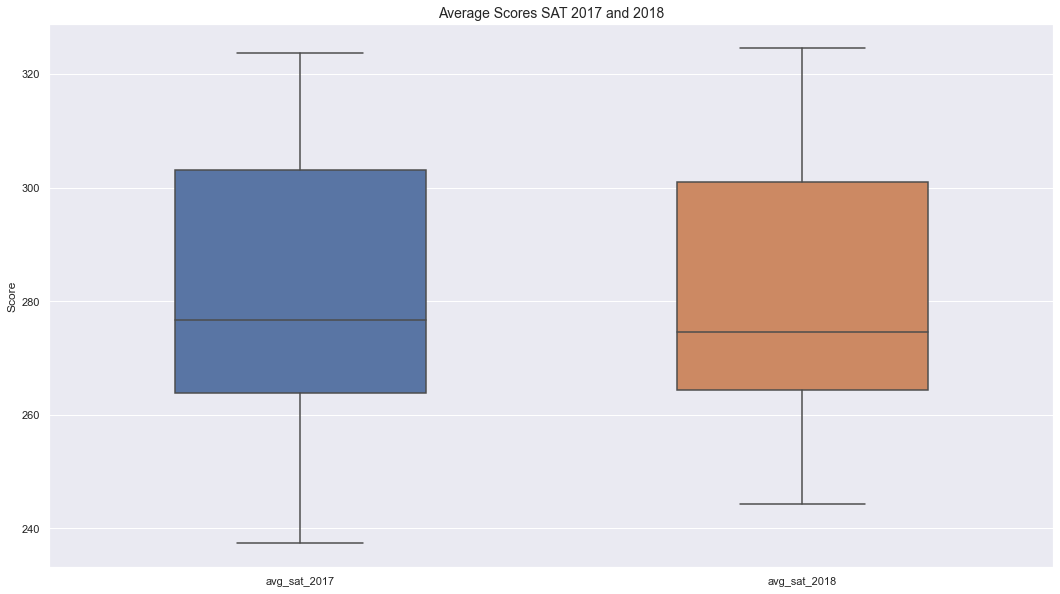

In [99]:
# boxplot for ACT Average Scores 2017 and 2018
ax= plt.subplots(figsize=(18,10))
plt.title('Average Scores SAT 2017 and 2018',fontsize=14)
plt.ylabel('Score',fontsize=12)
use=all_data[['avg_sat_2017','avg_sat_2018']]
sns.boxplot(data=use, width=0.5);

There are no significant movement in average scores between SAT 2017 and 2018, but shows a slight dip in median scores.

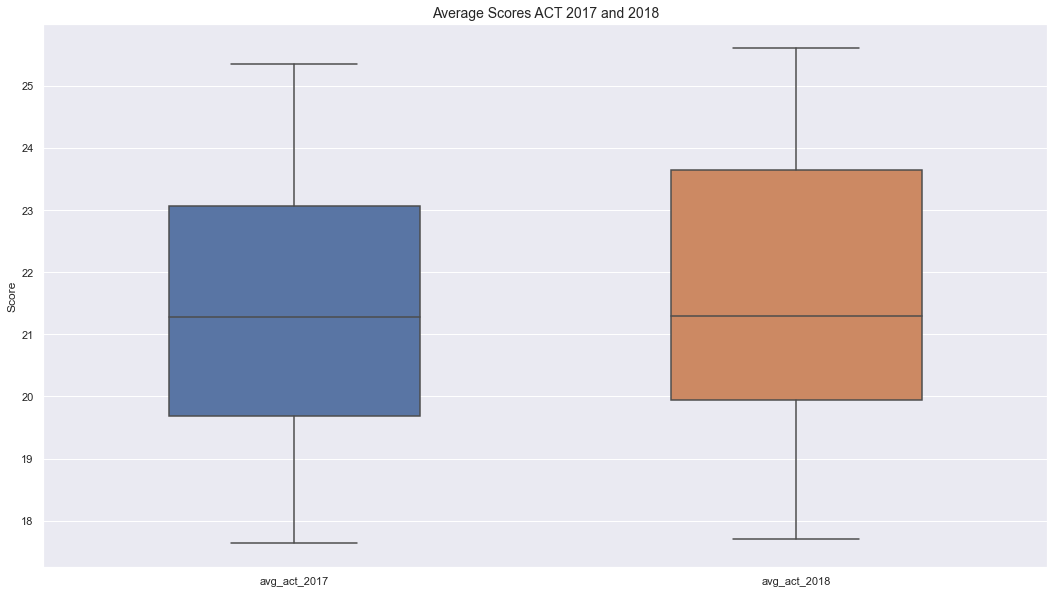

In [102]:
# boxplot for ACT Average Scores 2017 and 2018
ax= plt.subplots(figsize=(18,10))
plt.title('Average Scores ACT 2017 and 2018',fontsize=14)
plt.ylabel('Score',fontsize=12)
use=all_data[['avg_act_2017','avg_act_2018']]
sns.boxplot(data=use, width=0.5);

For average scores for ACT 2017 and 2018, median remains  relatively similar but shows changes in the lower quartile and upper quartile, from 23.06 to 23.60. Signifying that students scored better in the ACT 2018 as compared to 2017.  

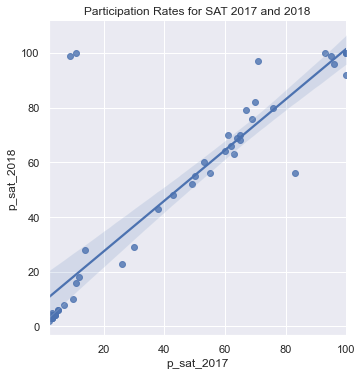

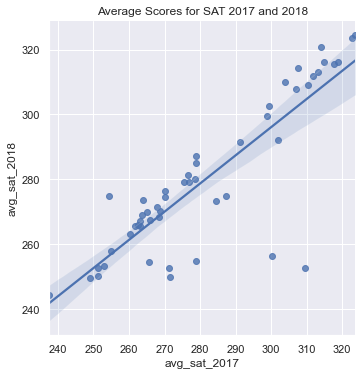

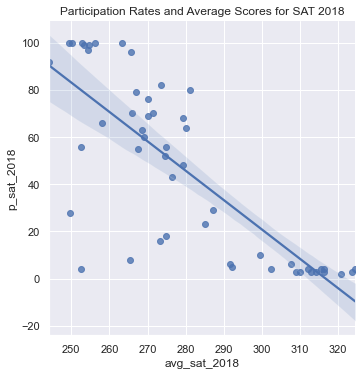

In [105]:
# SAT participation rate for 2017 and 2018

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x="p_sat_2017", y="p_sat_2018", data=all_data)
plt.title('Participation Rates for SAT 2017 and 2018')
plt.show()

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x="avg_sat_2017", y="avg_sat_2018", data=all_data)
plt.title('Average Scores for SAT 2017 and 2018')
plt.show()

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
sns.lmplot(x="avg_sat_2018", y="p_sat_2018", data=all_data)
plt.title('Participation Rates and Average Scores for SAT 2018')
plt.show()

#### Participation rates for SAT 2017 and 2018
There seems to be a moderate positive linear relationship between participation rates for SAT 2017 and 2018, with similar rates for both 2017 and 2018. 

With the exception of the top left, showing a low SAT participation rate for 2017 and increase to a high participation rate in 2018.

#### Average scores for SAT 2017 and 2018
There seems to be a moderate positive linear relationship between the average scores for SAT 2017 and 2018. States that score well in SAT 2017, generally also score well in 2018. With the exception of a few students who scored lower in 2018 than in 2017.

#### Participation Rates and Average Scores for SAT 2018
As seen from above, higher participation rates is not correlated with higher average scores.

## Conclusions and Recommendations

### States with a big jump for participation rates from 2017 to 2018
#### Colorado
From April 11th, 2017 all Colorado high school juniors are required to take the SAT. In 2016, only 5500 Colorado students took the test. Besides, Khan Academy is teaming with the College Board, the makers of the SAT, to provide free and personalized SAT study courses for Colorado students. This saw Colorado participation rate increased from 11% in 2017 to 100% in 2018.

https://testive.com/colorado-sat-change-2017/

https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/

#### Illinois
Similarly for Illinois, it has become mandatory statewide for high school juniors to take the SAT in order to enter a College from April 5th, 2017. Because of that, the participation rates saw a big jump from 9% in 2017 to 99% in 2018.

https://testive.com/illinois/

### States with low participation rates in 2017 and 2018
#### Arkansas
For years 2017 and 2018, participation rates for  SAT remains low at 3% and 5%. However, the participation rates for ACT for both years are high at 100%. This could be due to the State University, University of Arkansas, applicants are able to take the ACT exams on campus. 

https://admissions.uark.edu/apply/test-scores/index.php

#### Tennessee
The participation rates for SAT are 5% and 6% in 2017 and 2018, with ACT participation rates of 100% for both years.

The Tennessee education department has placed increased efforts on raising ACT scores over the past several years to ensure students are ready for college or a career. As well, more students scoring high on the ACT means that more are eligible for the HOPE scholarship, which provides college money for students reaching a 21 or higher on the ACT. To help aid improvements in scores, the state offered free retake opportunities for all students in 2017. Thus the high participation rates for ACT for both years.

https://www.tennessean.com/story/news/education/2017/10/10/tennessee-act-scores-improve-students-near-2020-goal/745996001/

### States with high participation rates for SAT participation rates
####  Connecticut and Delaware
The participation rates for Connecticut  and Delaware are at 100% for SAT for both 2017 and 2018. The is due to the change in State policy saying that all 11th graders in the state's public schools would soon be required to take the SAT college admissions tests. Because of the chnage in State policy, the ACT participation rates are lower in these States 2017 and 2018.

https://www.nytimes.com/2015/08/07/nyregion/connecticut-to-require-all-11th-graders-to-take-the-sat.html#:~:text=Connecticut%20announced%20on%20Thursday%20that,students%20are%20tested%20too%20much.

https://whyy.org/articles/ud-drops-satact-requirement-for-delaware-applicants/

### Recommendation
State which have a lower participation rate in SAT is Arkansas and Tennessee. They are one of the states which have yet to legistrate which test to adopt, it is recommend that the College Board to step up the following activities to enhance participation rates for SAT in states which do not have manadatory requirements to take ACT.

- Influence state school districts to include PSAT for high school juniors

- Bursary and Fee waivers to cover test costs: lower entry barrier for lower-income students

- Introduce PSAT(Preliminary SAT) for junior school students to prepare them for SAT examination

- Create more workshops and talks on sat to showcase success stories of SAT

https://www.safety.com/the-poorest-states-in-america/
